# 例題１

In [14]:
using ControlSystems
using LinearAlgebra
using Plots; gr();

In [2]:
s = tf('s');
P = (s+2)/(s^3 + 2*s^2 + 3*s + 4);

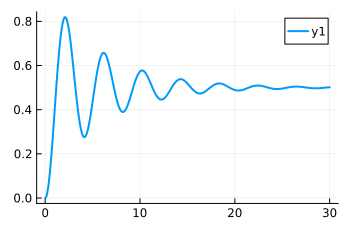

In [3]:
y, t = step( P, 0:0.01:30 )
plot(t, y', lw=2, size=(350,230))

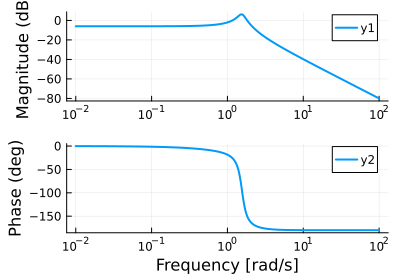

In [4]:
setPlotScale("dB")
bodeplot(P, lw=2, size=(400,280))

# 例題２

In [1]:
using ControlSystems
using LinearAlgebra

In [2]:
A = [ 0    1    0     0;
      0 -5.9 -0.6 0.001;
      0    0    0     1;
      0 21.1 37.3 -0.04 ]
B = [ 0; 0.6; 0; -2.1 ];

In [3]:
P = ss(A, B, Matrix(I,4,4), zeros(4,1) );
println("Poles:", poles(P)) # システムの極

Q = Diagonal([100, 1, 200, 1]); 
R = 0.5;
K = -lqr(P, Q, R) # 最適レギュレータの設計
println("K:", K)

L = ss(A, B, -K, 0); # 開ループ系
wgc, mag, wpc, phase = margin(L); # 安定余裕
println("Phase Margin:", phase[1])

Poles:[0.0, -7.009136350185121, -4.931430423373684, 6.00056677355881]
K:[14.142135623745148 28.253819473911854 90.73657908251344 14.76461764833214]
Phase Margin:62.32303886356317
